##### Dataset details:
- Gender (Categorical): Gender
- Age (Continuous): Age	
- Height (Continuous)
- Weight (Continuous)
- family_history_with_overweight (Binary): Has a family member suffered or suffers from overweight?
- FAVC (Binary): Do you eat high caloric food frequently?
- FCVC (Integer): Do you usually eat vegetables in your meals?
- NCP (Continuous/Integer): How many main meals do you have daily?
- CAEC (Categorical): Do you eat any food between meals? 
- SMOKE (Binary): Do you smoke?
- CH2O (Continuous): How much liters of water do you drink daily?	
- SCC (Binary): Do you monitor the calories you eat daily?	
- FAF (Continuous): How often do you have physical activity?		
- TUE (Integer): How much time do you use technological devices such as cell phone, videogames, television, computer and others?		
- CALC (Categorical): How often do you drink alcohol?		
- MTRANS (Categorical): Which transportation do you usually use?		
- NObeyesdad (Categorical): Obesity level

#### 1: Import libraries, load & clean data

In [19]:
# ----------------------------------------
# IMPORT LIBRARIES
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("../data/ObesityDataSet_raw.csv")

# Display basic info
print("Initial shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

# Encode only binary 'yes'/'no' columns to 1/0
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

# Print head of dataset
df.head()


Initial shape: (2111, 17)
Missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Duplicate Rows: 24


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### 2. EDA - EXPLORATORY DATA ANALYSIS

       Gender          Age       Height       Weight  \
count    2111  2111.000000  2111.000000  2111.000000   
unique      2          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1068          NaN          NaN          NaN   
mean      NaN    24.312600     1.701677    86.586058   
std       NaN     6.345968     0.093305    26.191172   
min       NaN    14.000000     1.450000    39.000000   
25%       NaN    19.947192     1.630000    65.473343   
50%       NaN    22.777890     1.700499    83.000000   
75%       NaN    26.000000     1.768464   107.430682   
max       NaN    61.000000     1.980000   173.000000   

        family_history_with_overweight         FAVC         FCVC          NCP  \
count                      2111.000000  2111.000000  2111.000000  2111.000000   
unique                             NaN          NaN          NaN          NaN   
top                                NaN          NaN          NaN          NaN   
fre

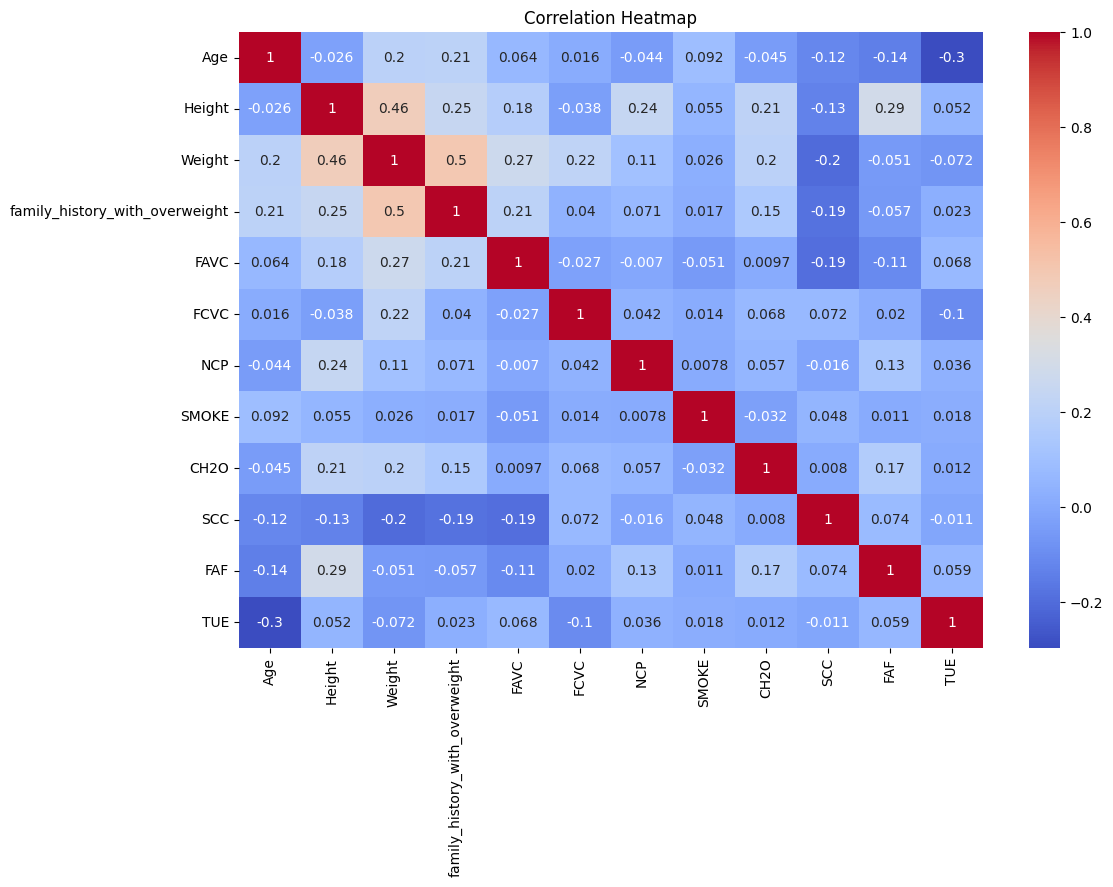

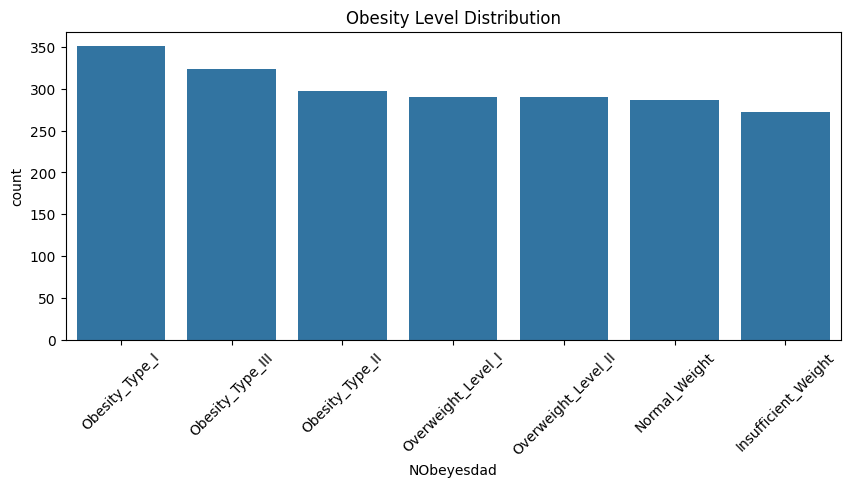

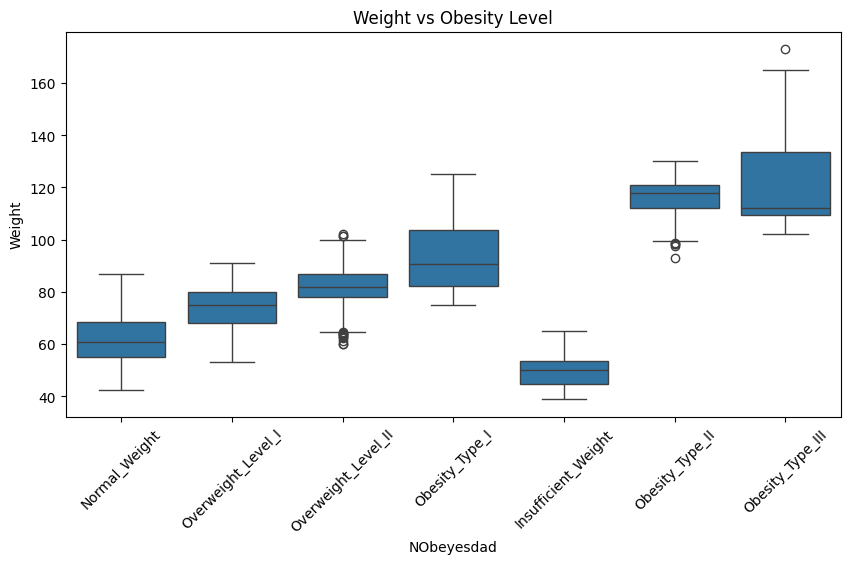

In [20]:
# 2.1 Descriptive Statistics
print(df.describe(include='all'))

# 2.2 Correlation Heatmap (Only for numeric fields)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2.3 Target Variable Distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="NObeyesdad", order=df["NObeyesdad"].value_counts().index)
plt.title("Obesity Level Distribution")
plt.xticks(rotation=45)
plt.show()

# 2.4 Boxplot of Weight by Obesity Level
plt.figure(figsize=(10, 5))
sns.boxplot(x="NObeyesdad", y="Weight", data=df)
plt.title("Weight vs Obesity Level")
plt.xticks(rotation=45)
plt.show()

#### 3. FEATURE SCALING & DATA SPLIT

In [21]:
# Select features and target
# Drop non-numeric columns that contain strings
non_numeric_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS']
features = df.drop(columns=["NObeyesdad"] + non_numeric_cols)
target = df["NObeyesdad"]

# Scale only numeric features
numeric_to_scale = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
features[numeric_to_scale] = scaler.fit_transform(features[numeric_to_scale])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1477, 12)
Test shape: (634, 12)


#### 4. MACHINE LEARNING MODEL: RANDOM FOREST

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9463722397476341
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.99      0.95      0.97        86
      Normal_Weight       0.83      0.95      0.88        93
     Obesity_Type_I       0.98      0.92      0.95       102
    Obesity_Type_II       0.97      0.99      0.98        88
   Obesity_Type_III       0.99      1.00      0.99        98
 Overweight_Level_I       0.95      0.88      0.91        88
Overweight_Level_II       0.94      0.94      0.94        79

           accuracy                           0.95       634
          macro avg       0.95      0.95      0.95       634
       weighted avg       0.95      0.95      0.95       634

Confusion Matrix:
 [[82  4  0  0  0  0  0]
 [ 1 88  0  0  0  3  1]
 [ 0  0 94  3  1  1  3]
 [ 0  0  1 87  0  0  0]
 [ 0  0  0  0 98  0  0]
 [ 0 10  0  0  0 77  1]
 [ 0  4  1  0  0  0 74]]


#### 5. Export Cleaned Dataset to CSV

In [23]:
# Save the cleaned and preprocessed dataset to a new CSV file
df.to_csv("../data/ObesityDataSet_Cleaned.csv", index=False)

print("Cleaned dataset exported successfully.")

Cleaned dataset exported successfully.
